regle de base: commencer par le developpement du MODELE le plus SIMPLE aux MODELE le plus COMPLEXE

suivant la règle de base, le principe de PARCIMONIE: c'est a dire  si j'ai 2 modèles qui ont les memes performances, je dois choisir le modèle le moins complexe possible
Mais etant donné que nous sommes en Prediction, on peut se permettre de choisir les modèles assez complexes si ils resultent plus performant.

## Modeles simple

# + Regression lineare

MOdèle basique:  utilisé seulement pour la prédiction d'une variable Quanti

Hypothèses:

- Homostedasticité   ( les erreurs doivent avoir une variance contante)
- Normalité des erreurs   (les erreurs doivent suivent une distribution normale)
- Multicolinearité   (les variables independantes ne doivent pas etre très correlées entre elles)
- Linearité   ( la relation entre les variables independentes et la variable dependante est lineaire)
- Independance des erreurs   ( les erreurs ou residus doivent etre independantes pas d'autocorrelation)

In [6]:
# importation des bibliothèques necessaire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# statsmodels c'est le package qui permet de faire les modeles de regression lineaire d'un point de vue STATISTIQUE
# sklearn    permet de faire les modeles de regression lineaire d'un point de vu MACHING LEARNING


In [7]:
df = pd.read_csv("data/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [12]:
df.CHAS = df.CHAS.astype("category")
df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object

In [14]:
variable_quali = df.select_dtypes(exclude = "number").columns
variable_quali

Index(['CHAS'], dtype='object')

In [18]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Selection des meilleurs variables avec SelectBeck

Methode par filtrage

### regression lineaire univariée

In [20]:
from sklearn.feature_selection import f_regression, SelectKBest

# je veux faire mon modele avec l'ensemble suivant
x_all = df.drop(columns = ["MEDV"]) # je supprime la cible de mon dataset
y_all = df["MEDV"]

# encoder mes variables categorielles
# get_dummies qui permet de trasformer ma variables qualitative en plusieurs modalités. pour chaque modelité de ma variable quali, j'attribue autre 2
# variables vrai ou faux/ cad je les transforme en variable binaire = dicotomiser afin que sa soit utilisables dans mon modèle de regression lienaire
x_all= pd.get_dummies(x_all, drop_first = True)
x_all

# tu encode de nouveau les variables booleens (true/false) en 0/1
x_all = x_all.apply(lambda x:x.astype(int) if x.dtypes == "bool" else x)
x_all

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,0


In [22]:
# une fois tranformé les variables quali , on applique maintenant SelectBeck pour selectioner automatiquement nos 10  meilleurs variables en fonction
# du score

selector = SelectKBest(score_func = f_regression, k = 10)
# puis je l'entraine sur ma base
x_selector = selector.fit_transform(x_all, y_all)

# recuperation des noms des meilleurs variables en fonction du score
cols = selector.get_support(indices = True)
best_features = x_all.columns[cols]
print("les 10 meilleurs variables sélectionnées sont :")
best_features

les 10 meilleurs variables sélectionnées sont :


Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT'],
      dtype='object')

In [24]:
# jai mes dix meilleur variables selectionnnées, voyons voir leur scores et classons les par ordre decroissant
features_score_selected = pd.DataFrame({"features": x_all.columns, "score": selector.scores_})
features_score_selected = features_score_selected.sort_values( by = "score", ascending = False)
features_score_selected

,features,score
11,LSTAT,601.617871
4,RM,471.846740
9,PTRATIO,175.105543
2,INDUS,153.954883
8,TAX,141.761357
3,NOX,112.591480
0,CRIM,89.486115
7,RAD,85.914278
5,AGE,83.477459
1,ZN,75.257642


## modèle de regréssion lineaire (construction) 

avant de contruire mon MODELE DE MACHING LEARNING

- 1° reflexe: 
- je restrain ma base de donnnée avec uniquement les meilleurs variables choisit
- je fais ce qu'on appelle la validation croisée: x_train/y_train = la base qui va nous permettre de construire le modèle. et
 x_test/y_test = la base va nous permettre de tester les performance du modèle

on fait cette separation pour eviter le surapprentissage, en gros la règle selon laquel , le modèle n'est plus performant quand on l'applique sur une base étrangère , autre que la base d'apprentissage


In [26]:
# je restraint ma base uniquement en selectionnant uniquement les 10 meilleurs variables
x = x_all[best_features]
y = y_all

In [28]:
x

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,1,273.0,21.0,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,1,273.0,21.0,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,1,273.0,21.0,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,1,273.0,21.0,6.48


In [30]:
# separation en base d'apprenstissage et base de test
# test_size = 30 %  et train_size = 70% en general

# le choix des different base se fait se manière aleatoire. pour me rassurer que ceci soit controller je fixe l'alea / la graine
# avec random_state = 42 cad a chaque fois que je vais executer le code , j'aurai exactement le meme resultat car les bases seront identiques

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [32]:
# ajout d'une constante (beta0) dans ma base via le package statsmodel
x_train_sm = sm.add_constant(x_train)
x_train_sm

,const,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
5,1.0,0.02985,0.0,2.18,0.458,6.430,58.7,3,222.0,18.7,5.21
116,1.0,0.13158,0.0,10.01,0.547,6.176,72.5,6,432.0,17.8,12.04
45,1.0,0.17142,0.0,6.91,0.448,5.682,33.8,3,233.0,17.9,10.21
16,1.0,1.05393,0.0,8.14,0.538,5.935,29.3,4,307.0,21.0,6.58
468,1.0,15.57570,0.0,18.10,0.580,5.926,71.0,24,666.0,20.2,18.13
...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,0.17120,0.0,8.56,0.520,5.836,91.9,5,384.0,20.9,18.66
270,1.0,0.29916,20.0,6.96,0.464,5.856,42.1,3,223.0,18.6,13.00
348,1.0,0.01501,80.0,2.01,0.435,6.635,29.7,4,280.0,17.0,5.99
435,1.0,11.16040,0.0,18.10,0.740,6.629,94.6,24,666.0,20.2,23.27


In [34]:
# ajout d'une constante (beta0) dans ma base via le package statsmodel
x_train_sm = sm.add_constant(x_train)
x_train_sm

# creation du modele de regression lineaire/ une fois que j'ai ma constante avec toutes mes variables, je peux entrainer mon modèle
# .fit() veut dire trouve moi les valeurs de beta0, beta1... beta(n) pour entrainer
model = sm.OLS(y_train, x_train_sm).fit()

In [36]:
# afficher les resultat du modèle/ une fois le modèle entrainé, je peux maintenant l'analyser: voici donc mon modèle construit
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     79.77
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           2.91e-83
Time:                        22:36:36   Log-Likelihood:                -1081.9
No. Observations:                 354   AIC:                             2186.
Df Residuals:                     343   BIC:                             2228.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7124      5.789      4.269      0.000      13.325      36.100
CRIM          -0.1228      0.044     -2.822      0.005      -0.208      -0.037
ZN            -0.0021      0.017     -0.122      0.903      -0.036       0.032
INDUS          0.1271      0.077      1.650      0.100      -0.024       0.279
NOX           -7.0300      4.877     -1.441      0.150     -16.623       2.563
RM             4.3020      0.529      8.139      0.000       3.262       5.342
AGE            0.0217      0.017      1.310      0.191      -0.011       0.054
RAD            0.2377      0.087      2.726      0.007       0.066       0.409
TAX           -0.0100      0.005     -2.020      0.044      -0.020      -0.000
PTRATIO       -0.9859      0.165     -5.959      0.000      -1.311      -0.661
LSTAT         -0.6131      0.063     -9.741      0.000      -0.737      -0.489
==============================================================================
Omnibus:                      136.019   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.411
Skew:                           1.625   Prob(JB):                    2.51e-126
Kurtosis:                       8.352   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

le test de sigificativité de mon modèle globale: H(0) = tous les coef sont nulle = 0
                                                H(1) = au moins un coef est different de 0

je vois que la p_value de mon test Prob (F-statistic) < 0,05 donc l'ypothese H(0) est rejeté  

conclusion : mon modèle est STATISTIQUEMENT SIGNIFICATIVE en d'autre terme au moins une variable a un coef different de 0, donc le modele est pertinant pour expliquer la valeur des biens immobilier


- Puis on a le test t_student de significativité de chaque variable: qui nous oriente sur les variables qu'on peut enlever ou pas de notre modele

on a par exemple : pour un nouveau bien , si la variable NOX(concentration en oxide d'azote) augmente d'une unité, le prix de la maison diminue de 7£ mais cette diminution n'est pas statistiquement significative vu la sa p_value( donc je peux l'enlever de mon modele)


- notre modèle explique et predit le prix du bien immobilier a 69,9%

  regle de base
  le R-squared = R^2 doit toujours etre > 50%
  si c'est < 50% le modèle ne fait pas mieux que le hasard


  quand on veut comparer la performance de 2 modeles avec les variables differentes, il faut regarder plutot le Adj. R-squared au lieu du R-squared

  la logique est la suivante:
  plus tu as de variables dans ton modèle, plus ton R-squared a tendence a augmenter en theorie
  pour eviter cela on regarde plutot le Adj. R-squared qui tient compte du nombre de variable dans le modèle

## verification des hypotheses de mon modèle

pour que les resultats d'une regression lineaire soit valide, plusieurs hypothese doivent etre varifiées

###  1- linearité

In [ ]:
la relation entre les variables independantes et la variables dependente doit etre linéaire.

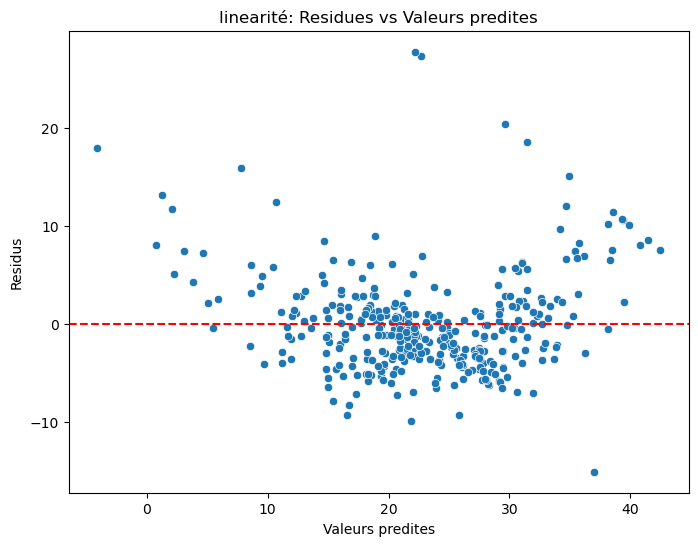

In [64]:
# linearité = verification visuelle avec le plot des residus contre la valeur predite
# residus = valeur observée - valeur predite
y_pred = model.predict(sm.add_constant(x_train))
residuals = y_train - y_pred

plt.figure(figsize = (8,6))
sns.scatterplot(x = y_pred, y = residuals)
plt.axhline(0, color = "r", linestyle = "--")
plt.title("linearité: Residues vs Valeurs predites")
plt.xlabel("Valeurs predites")
plt.ylabel("Residus")
plt.show()

## 2- homostedasticité

- les erreurs doivent avoir une variance constante
Hypothese phare de la regression linaire

ATTENTION dans la pratique cette hypothese n'est jamais verifiée via les test, le test dit que sa ne valide pas
mais pour verifier l'homostedastisticite on regarde seulement le graphique precedent, GRAPHIQUE, des residus et VALEUR PREDITES.
si les residus ont une forme particulière: tjr CROISSANT, forme en W, ou forme en ENTONOIR on valide l'hypothese

nota : ne pas trop s'appesentir sur cette hypothese dans la pratique.

- si l'homostedastiscité n'est pas verifié , les intervalles de confiance autour de ma prediction ne seront pas PERTINENT

In [69]:
# HOMOSTEDASTICITE ( test de Breusch-pagan)

from statsmodels.stats.diagnostic import het_breuschpagan, het_white
bp_test = het_breuschpagan(residuals, sm.add_constant(x_train))
labels = ("LM stat", "LM p_value", "F-stat", "F P_value")
print (dict(zip(labels, bp_test )))

{'LM stat': 30.543817628994105, 'LM p_value': 0.000697607070864905, 'F-stat': 3.238933128422428, 'F P_value': 0.0005219538214290806}


H(0) les residus on une variance constante (HOMOSTEDASTICITE) donc le modèle est corectement specifié
H(1) les residus n'ont pas une variance constante (HETEROSTEDASTCITE) donc une mauvaise specification du modele

In [79]:
# HOMOSTEDASTICITE ( test de white)

white_test = het_white(residuals, sm.add_constant(x_train))
print("test de white:")
labels = ("LM stat", "LM p_value", "F-stat", "F P_value")
print (dict(zip(labels, white_test )))

test de white:
{'LM stat': 211.66646972266224, 'LM p_value': 1.9859282412867577e-17, 'F-stat': 6.58906780015448, 'F P_value': 6.538585144483947e-30}


## 3- non autocorrelation des erreurs

les erreurs doivent etre independantes, non auto-correlées

In [86]:
# NON AUTOCORRELATION : test de durbin_watson

from statsmodels.stats.stattools import durbin_watson
dw_test = durbin_watson(model.resid)
print(f"test de durbin-watson : {dw_test} (proche de 2 signifie absence d'autocorrelation des erreurs)")

test de durbin-watson : 2.13589557514636 (proche de 2 signifie absence d'autocorrelation des erreurs)


nota : a moins que nos donnees soit temporelle.
ou une depend de l'autre cette hypothèse de NON AUTO_CORRELATION DES ERREURS est toujours verifié

## 4- absence de multicolinéarité

hypothese très IMPORTANT dans la regression lineaire
il ne doit pas y avoir de multicolinéarité très elevée entre mes variables explicatives

on calcul le Facteur d'Inflation de la Variance (VIF) pour evaluer cela:

il ne doit pas etre SUPERIEUR a 10 ( entre 5 e 10 en theorie)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["features"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i ) for i in range(len(x_train.columns))]
print("Facteur d'inflation de la variance (VIF) :") 
vif_data

Facteur d'inflation de la variance (VIF) :


,features,VIF
0,CRIM,1.990707
1,ZN,2.408127
2,INDUS,13.066140
3,NOX,75.649594
4,RM,72.175119
5,AGE,18.978251
6,RAD,14.243069
7,TAX,60.548820
8,PTRATIO,57.935234
9,LSTAT,9.727955


interpretation: 
on constate qu'il y'a  pas mal de variables qui ont un VIF>10

donc PRESENCE DE MULTICOLINEARITE: on doit le corriger ABSOLUMENT pour avoir un modele PRECI


mais le test ne nous dit pas tel variable est très liée a tel variable
raison pour laquel on refait la matrice de correlation pour voir quelles sont les variables qui sont liés et puis les supprimer MANUELLEMENT


PRESENCE DE VARIABLES PAS STATISTIQUEMENT SIGNIGIFICATIVE: je dois les supprimer automatiquement de mon modele ou pas ?

sa depend de mon l'objectif:

si l'objectif est de faire les predictions du prix des maison= je peux les laisser en expliquant que sa n'apporte rien sur le prix, ici on s'interesse plus a  la performance du modèle

si l'objectif est d'expliquer le prix des maison = je peux les supprimer car sa n'apportr rien a mon modele, ici on s'interesse plus a la significativité de l'ensembles des variables

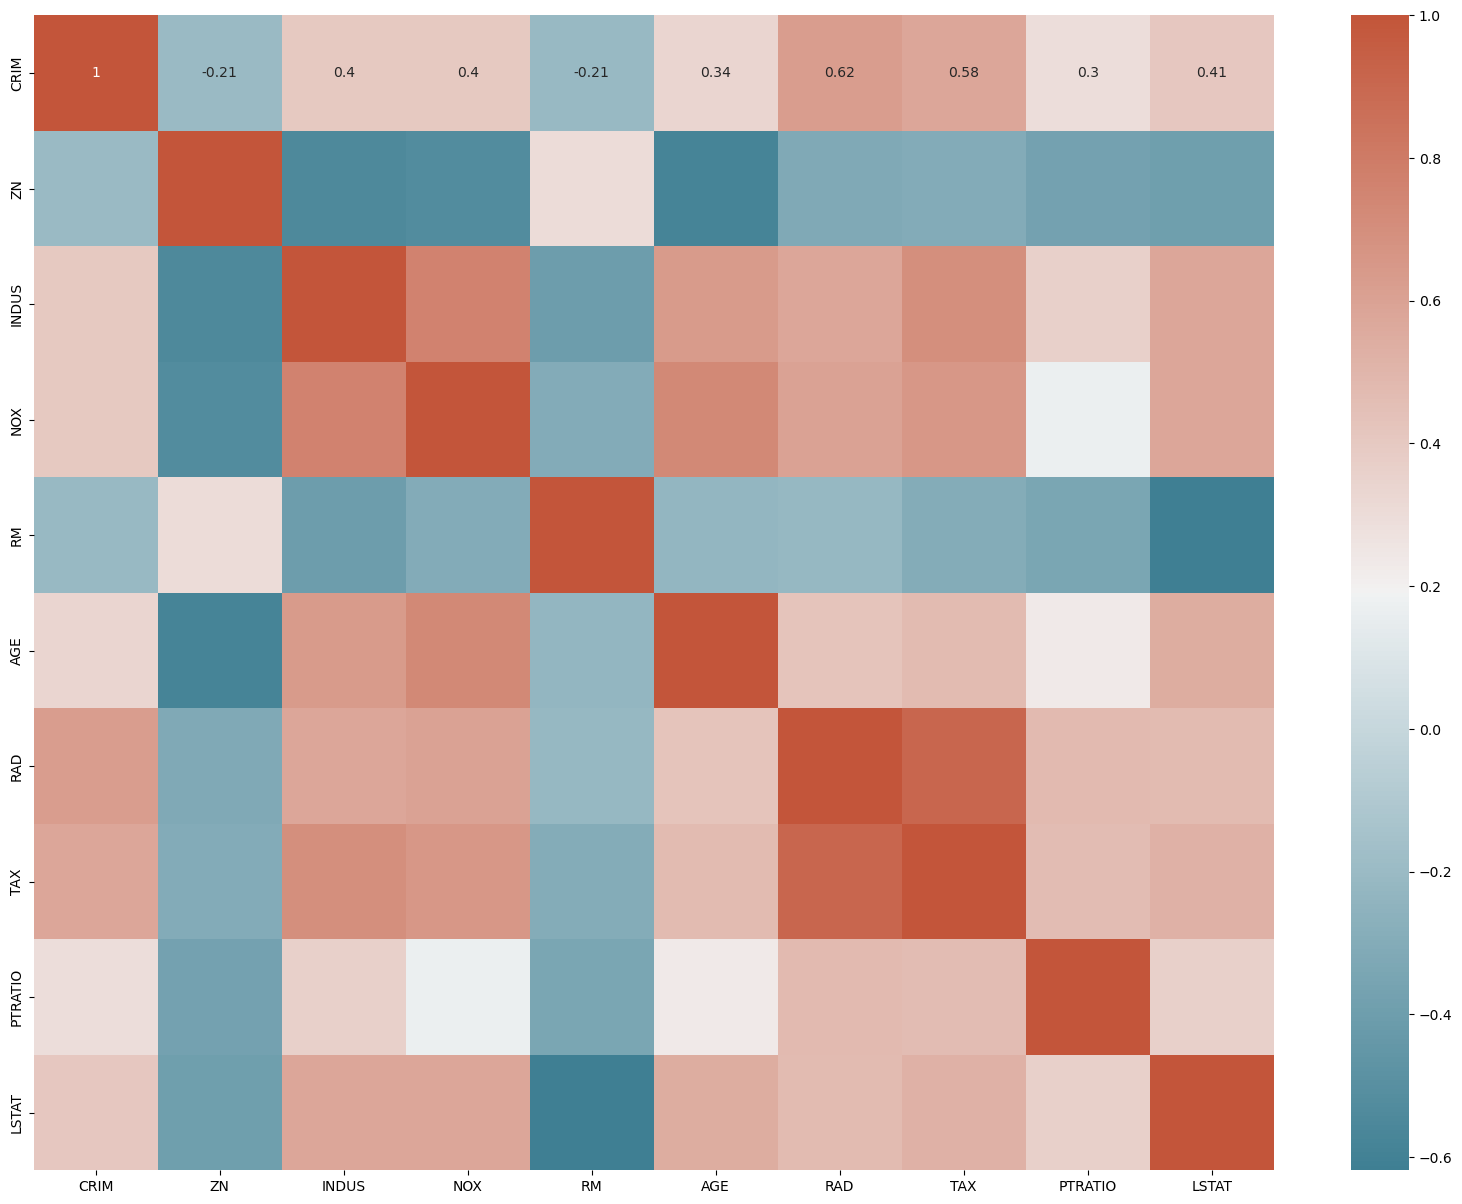

In [40]:
# calcul de nouveau de la matrice de correlation
import matplotlib.pyplot as plt
import seaborn as sns

 # matrice de correlation
corrmat = x_train.corr(method = "pearson")

# pour modifier la taille de l'image

fig, ax = plt.subplots()
fig.set_size_inches(20, 15)

# carte de couleur personalisée
cmap = sns.diverging_palette(220, 20 , as_cmap = True)



# creer un carte thermique heatmap de correlation avec seaborn
sns.heatmap(corrmat, cmap = cmap,   annot = True)
plt.show()

In [42]:
corrmat

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
CRIM,1.000000,-0.205413,0.399643,0.402031,-0.210556,0.336697,0.622745,0.582164,0.296443,0.409681
ZN,-0.205413,1.000000,-0.544907,-0.527921,0.299282,-0.583271,-0.318947,-0.306276,-0.375349,-0.393315
INDUS,0.399643,-0.544907,1.000000,0.764135,-0.407417,0.635749,0.579284,0.702541,0.362794,0.578976
NOX,0.402031,-0.527921,0.764135,1.000000,-0.305756,0.733034,0.595620,0.655932,0.169297,0.581960
RM,-0.210556,0.299282,-0.407417,-0.305756,1.000000,-0.227609,-0.219261,-0.296173,-0.345720,-0.618609
AGE,0.336697,-0.583271,0.635749,0.733034,-0.227609,1.000000,0.425143,0.475100,0.230440,0.550824
RAD,0.622745,-0.318947,0.579284,0.595620,-0.219261,0.425143,1.000000,0.909381,0.481114,0.473225
TAX,0.582164,-0.306276,0.702541,0.655932,-0.296173,0.475100,0.909381,1.000000,0.465101,0.525003
PTRATIO,0.296443,-0.375349,0.362794,0.169297,-0.345720,0.230440,0.481114,0.465101,1.000000,0.361428
LSTAT,0.409681,-0.393315,0.578976,0.581960,-0.618609,0.550824,0.473225,0.525003,0.361428,1.000000


on voit que la variable TAX est tres correle avec la variable RAD


je procede a une forme de correction en tenant compte du vif de ma variable et de l'importance de ma varible

et a chaque suppression d'une variable je refais ces 3 operations suivant:

- je la supprime de ma base
-  je reexecute mon modele
-  je verifie de nouveau la multicolinearité

In [44]:
x_train = x_train.drop(columns = "TAX")

In [46]:
x_train = x_train.drop(columns = "NOX")

In [48]:
x_train = x_train.drop(columns = "AGE")

In [50]:
x_train = x_train.drop(columns = "PTRATIO")

In [52]:
x_train = x_train.drop(columns = "ZN")

In [54]:
x_train = x_train.drop(columns = "RAD")

In [56]:
x_train = x_train.drop(columns = "INDUS")

In [58]:
# ajout d'une constante (beta0) dans ma base via le package statsmodel
x_train_sm = sm.add_constant(x_train)
x_train_sm

# creation du modele de regression lineaire/ une fois que j'ai ma constante avec toutes mes variables, je peux entrainer mon modèle
# .fit() veut dire trouve moi les valeurs de beta0, beta1... beta(n) pour entrainer
model = sm.OLS(y_train, x_train_sm).fit()

In [60]:
# afficher les resultat du modèle/ une fois le modèle entrainé, je peux maintenant l'analyser: voici donc mon modèle construit
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     225.0
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           2.57e-81
Time:                        22:40:04   Log-Likelihood:                -1104.4
No. Observations:                 354   AIC:                             2217.
Df Residuals:                     350   BIC:                             2232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2406      3.746     -0.331      0.741      -8.608       6.127
CRIM          -0.1236      0.039     -3.192      0.002      -0.200      -0.047
RM             5.0966      0.520      9.804      0.000       4.074       6.119
LSTAT         -0.6082      0.056    -10.796      0.000      -0.719      -0.497
==============================================================================
Omnibus:                      121.419   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.193
Skew:                           1.492   Prob(JB):                     1.57e-96
Kurtosis:                       7.583   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["features"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i ) for i in range(len(x_train.columns))]
print("Facteur d'inflation de la variance (VIF) :") 
vif_data

Facteur d'inflation de la variance (VIF) :


,features,VIF
0,CRIM,1.406438
1,RM,3.251449
2,LSTAT,3.888113


j'obtiens donc su final après suppression des variables ce modèle finale sans la presence de  MULTICOLINEARITE: donc on a un modele plus preci

- notre modèle avec et sans la presence de MULTICOLINEARITE est passé d'une performance de 69,9% a une performance de  65,9% nous somme toujours au dessus de 50% donc le R2 est toujours acceptable

## optimisation

la on a obtenu notre modèle avec les 2 premiers et la 4° meilleurs variables en generale, ajoutons la 3° meilleur variables

DIS = ( distance ponderées aux 5 centres d'emplois de boston) pour voir l'impact en terme de performance

In [69]:
x_all["DIS"]

0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
        ...  
501    2.4786
502    2.2875
503    2.1675
504    2.3889
505    2.5050
Name: DIS, Length: 506, dtype: float64

In [71]:
x_train = x_train.join(x_all["DIS"])
x_train

,CRIM,RM,LSTAT,DIS
5,0.02985,6.430,5.21,6.0622
116,0.13158,6.176,12.04,2.7301
45,0.17142,5.682,10.21,5.1004
16,1.05393,5.935,6.58,4.4986
468,15.57570,5.926,18.13,2.9084
...,...,...,...,...
106,0.17120,5.836,18.66,2.2110
270,0.29916,5.856,13.00,4.4290
348,0.01501,6.635,5.99,8.3440
435,11.16040,6.629,23.27,2.1247


In [75]:
# ajout d'une constante (beta0) dans ma base via le package statsmodel
x_train_sm = sm.add_constant(x_train)
x_train_sm

# creation du modele de regression lineaire/ une fois que j'ai ma constante avec toutes mes variables, je peux entrainer mon modèle
# .fit() veut dire trouve moi les valeurs de beta0, beta1... beta(n) pour entrainer
model = sm.OLS(y_train, x_train_sm).fit()

# afficher les resultat du modèle/ une fois le modèle entrainé, je peux maintenant l'analyser: voici donc mon modèle construit
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           2.27e-83
Time:                        22:52:50   Log-Likelihood:                -1096.7
No. Observations:                 354   AIC:                             2203.
Df Residuals:                     349   BIC:                             2223.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5244      3.867      0.912      0.363      -4.080      11.129
CRIM          -0.1565      0.039     -4.027      0.000      -0.233      -0.080
RM             4.8975      0.512      9.566      0.000       3.891       5.904
LSTAT         -0.6929      0.059    -11.690      0.000      -0.810      -0.576
DIS           -0.6211      0.158     -3.926      0.000      -0.932      -0.310
==============================================================================
Omnibus:                       97.017   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.794
Skew:                           1.230   Prob(JB):                     7.95e-66
Kurtosis:                       6.778   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["features"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i ) for i in range(len(x_train.columns))]
print("Facteur d'inflation de la variance (VIF) :") 
vif_data

Facteur d'inflation de la variance (VIF) :


,features,VIF
0,CRIM,1.485298
1,RM,9.174400
2,LSTAT,4.063601
3,DIS,5.118359





  justement après  l'ajout de la dite variable, j'ai un modèle plus  performant je suis passer a un R2 = 67,3%
  

  cette variable ne faisant pas partie des mes 10 premiers en terme de score, il etait classer avant dernier donc 12° de tous mes variables
 (comme j'ai très peux de variables(13) je peux bien me permetre de faire mon modèle avec tous mes variables) 

## 5- Normalité des erreurs

C:\Users\tchaf\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


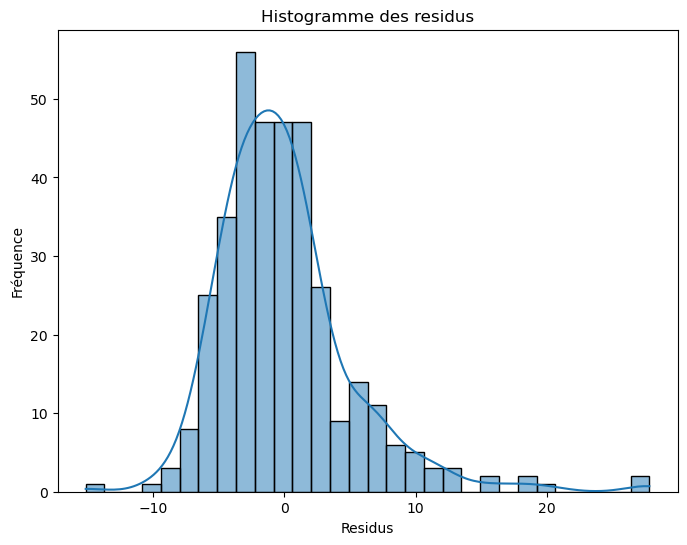

In [253]:
# histogramme des erreurs
plt.figure(figsize = (8,6))
sns.histplot(residuals, kde = True)
plt.title("Histogramme des residus")
plt.xlabel("Residus")
plt.ylabel("Fréquence")
plt.show()

la courbe semble etre  une forme en cloche, mais c'est loin d'etres une distribution normale, a cause des queux qui n'est pas identique de part et d'autre et s'etend beaucoup sur la droite, signe d'exces de valeur extreme

pour le verifier on a le test de shapiro

les test confiment, p_value < 0.05 donc H(0 ) rejeté domc les donnes ne suivent pas une distribution NORMALE

selon le TEOREME CENTRAL LIMITE: etant données qu'on a plus de 30 observations, on peut dire statistiquement que les residus suivent une loi normale

In [255]:
from scipy.stats import shapiro, normaltest, jarque_bera
# test de shapiro-wilk
sahapiro_test = shapiro(residuals)
print(f"test de Shapiro-Wilk : {sahapiro_test}")

test de Shapiro-Wilk : ShapiroResult(statistic=0.8925338983535767, pvalue=4.392656536769809e-15)


In [257]:
# test de jarque-bera
jb_test= jarque_bera(residuals)
print(f"test de jarque-bera : {jb_test}")

test de jarque-bera : SignificanceResult(statistic=578.4111939905888, pvalue=2.509603373057838e-126)


CONCLUSION: j'ai donc au final mon modele, les hypotheses sont verifiées (avec la normalité un peu forcée) = donc je peux l'utiliser

maintenant on va mettre en place des predictions , tout en verifiant la PERFORMANCE, etant donné que notre objectif c'est la prédiction, on s'interesse plus a la performance

In [81]:
x_train.columns

Index(['CRIM', 'RM', 'LSTAT', 'DIS'], dtype='object')

In [83]:
x_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT'],
      dtype='object')

In [85]:
x_test = x_test.join(x_all["DIS"])
x_test

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,DIS
173,0.09178,0.0,4.05,0.510,6.416,84.1,5,296.0,16.6,9.04,2.6463
274,0.05644,40.0,6.41,0.447,6.758,32.9,4,254.0,17.6,3.53,4.0776
491,0.10574,0.0,27.74,0.609,5.983,98.8,4,711.0,20.1,18.07,1.8681
72,0.09164,0.0,10.81,0.413,6.065,7.8,4,305.0,19.2,5.52,5.2873
452,5.09017,0.0,18.10,0.713,6.297,91.8,24,666.0,20.2,17.27,2.3682
...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0.740,6.406,97.2,24,666.0,20.2,19.52,2.0651
23,0.98843,0.0,8.14,0.538,5.813,100.0,4,307.0,21.0,19.88,4.0952
225,0.52693,0.0,6.20,0.504,8.725,83.0,8,307.0,17.4,4.63,2.8944
433,5.58107,0.0,18.10,0.713,6.436,87.9,24,666.0,20.2,16.22,2.3158


## Evaluation des performance du modèle

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

selected_variables = [
    "CRIM",                         # le taux de crimilalité par habitant dans la ville
    "RM",                           # nombre moyen de pièce par logement
    "LSTAT",                        # pourcentage de la population de statut socio-economique inferieur
    "DIS"                          # distance pondérées au 5 centres d'emplois de boston
]
selected_variables

['CRIM', 'RM', 'LSTAT', 'DIS']

In [89]:
# filtrer les variables selectionnées dans les ensembles Train et Test

x_train_selected = x_train[selected_variables]
x_test_selected = x_test[selected_variables]

# ajout d'une constante pour le modele (statsmodels)
x_train_selected_sm = sm.add_constant(x_train_selected)

# creation du modele de regression lineaire avec statmodels
model = sm.OLS(y_train , x_train_selected_sm).fit()

# afficher les resultat du modèle
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           2.27e-83
Time:                        22:58:08   Log-Likelihood:                -1096.7
No. Observations:                 354   AIC:                             2203.
Df Residuals:                     349   BIC:                             2223.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5244      3.867      0.912      0.363      -4.080      11.129
CRIM          -0.1565      0.039     -4.027      0.000      -0.233      -0.080
RM             4.8975      0.512      9.566      0.000       3.891       5.904
LSTAT         -0.6929      0.059    -11.690      0.000      -0.810      -0.576
DIS           -0.6211      0.158     -3.926      0.000      -0.932      -0.310
==============================================================================
Omnibus:                       97.017   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.794
Skew:                           1.230   Prob(JB):                     7.95e-66
Kurtosis:                       6.778   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# prédire sur la base d'entrainement

y_train_pred = model.predict(x_train_selected_sm)

# predire sur la base de test( base differenete)
x_test_selected_sm = sm.add_constant(x_test_selected)
y_test_pred = model.predict(x_test_selected_sm)

maintenant on a notre prediction, on peut calculer les indicateurs de performance qui sont sur nos 2 bases: y_train et y_test par rapport a mes predictions 

- R2 = pourvoir d'explicabilité du modèle   /   plus c'est proche de 1 mieux le modèle explique les variations de ma variables cible

- RMSE = difference entre la valeur reelle et la valeur predite/  plus c'est faible mieux le modèle est precis
  
- MSE =  moyenne des carrés d'errueus/   plus c'est faible mieux c'est
  
- MAE= moyenne des valeurs absolue des erreurs /  plus elle est faible, meilleurs est la prediction
  
- MAPE = moyennes des erreurs absolue en pourcentage

In [93]:
# calcul les metriques sur la base d'entrainement(apprentissage)

train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred)/y_train)) * 100

In [95]:
# calcul les metriques sur la base test

train_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_test, y_test_pred)
train_mape = np.mean(np.abs((y_test - y_test_pred)/y_test)) * 100

In [97]:
# creation d'un tableau pour afficher les resultats
results = pd.DataFrame({
    "Metrique": ["R2", "RMSE", "MSE", "MAE", "MAPE"],
    "train": [train_r2, train_rmse, train_mse, train_mae, train_mape],
    "test": [train_r2, train_rmse, train_mse, train_mae, train_mape]
})

# arrondir les resultat a 2 hiffres après la virgule
results = results.round(4)

results

,Metrique,train,test
0,R2,0.6020,0.6020
1,RMSE,5.4454,5.4454
2,MSE,29.6529,29.6529
3,MAE,4.0369,4.0369
4,MAPE,22.2605,22.2605


Tous ces indicateurs sont très proches, voir identique sur les 2 bases: donc je peux VALIDER  mon MODELE et le mettre en production
donc mon modèle perfome aussi très bien sur la base de test.

les R^2 sont identique, donc il y'a pas SURAPPRENTISSAGE  si c'est le cas le R^2 de ma base test sera tres different de celle de ma base d'appentissage

INTERPRETATION / EXPLICATION

un des point POINT FORT de la REGRESSION LINEAIRE, je peux facilement expliquer l'impact sur ma variable cicle en se basant sur les coefficient des mes variables.


- si le taux de criminalité augmente d'1 unite ---> alors le prix de la maison diminue de 0,15 cent
  
- si le ne nombre de pièce par logement augmente d'une unite ----> alors le prix de la maison augmente de 4,89£
  
- si la distance pondérées des 5 centres d'emploi de Boston augmente d'1 unité ----> alors le prix de la maison diminue de 0,62 cent
  
- si le pourcentage de la population de statut socio-economique inferieur augmente d'1 unité ---> alors le prix de la maison diminue de 0,69 cent

# + Arbre de decision

utilisé pour predire: soit les variables Quali( qui ont 02 modalité) et les variables Quanti 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/boston.csv")


In [3]:
df.CHAS = df.CHAS.astype("category")
df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object

In [5]:

# supprimer la cible de ma base de données
x = df.drop(columns = ["MEDV"])
y = df["MEDV"]

In [9]:
# division de ma base/ a chaque fois qu'on fait du maching learning, il faut diviser la base de donnéesen 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

In [11]:
# CODE DE CONSTRUCTION DE L'ARBRE

#OneHotEncoder permet de tranformer les variables categorielle en variable binaire(0,1) pour mon modele. on va dicotomiser la variable
#  ColumnTransformer c'est une technique qui permet de transformer l'ensemble des colonnes avec une technique qu'on a bie definit
# Prétraitement des données
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Les colonnes catégorielles sont celles de type 'object' ou 'category'

# Identification automatique des colonnes catégorielles
cat_columns = x_train.select_dtypes(include=[ "category"]).columns.tolist()

# Transformer les variables catégorielles/ j'applique la transfortion su l'ensemble de colonne categorielle,( cat, )
# je dicotomine les variables quali  avec OneHotEncoder tout en supprimant la 1° modalité ( drop = first)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_columns)  #  creer un processur avec One-hot encoding pour les colonnes catégorielles
    ],
    remainder='passthrough'  # Laisser les autres colonnes inchangées/ donc je ne fais aucune transformation sur les variables quali
)

In [13]:
#  ajuster le processuer sur l'ensemble d'entrainement etTransformer les variables catégorielles avec OneHotEncoder et garder les autres variables
# inchangées
# une fois tranformé les variables categorielles,  je pren mon preprocessor defini plus haut je l'applique ma transformation sur la base d'apprentissage
#et test
X_train_transformed = preprocessor.fit_transform(x_train)
X_test_transformed = preprocessor.transform(x_test)

# je récupere l'ensemble  colonnes categorielle après transformation
# Noms des colonnes OneHotEncoder pour les variables catégorielles
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns)
onehot_columns


array(['CHAS_1'], dtype=object)

In [15]:
# maintenant je veux l'ensemble des colonnes pour crer mon dataframe. le prend la liste des colonne categorielle transformées: onehot_columns et la liste 
# des variables quantitatives
new_columns = list(onehot_columns) + list(x_train.select_dtypes(exclude=["category"]).columns)

#  puis je Convertir en DataFrame avec les nouveaux noms de colonnes
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=new_columns, index=x_train.index)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=new_columns, index=x_test.index)

# Afficher les premières lignes du DataFrame transformé
print(X_train_transformed_df.head())

     CHAS_1      CRIM   ZN  INDUS    NOX     RM   AGE     DIS   RAD    TAX  \
5       0.0   0.02985  0.0   2.18  0.458  6.430  58.7  6.0622   3.0  222.0   
116     0.0   0.13158  0.0  10.01  0.547  6.176  72.5  2.7301   6.0  432.0   
45      0.0   0.17142  0.0   6.91  0.448  5.682  33.8  5.1004   3.0  233.0   
16      0.0   1.05393  0.0   8.14  0.538  5.935  29.3  4.4986   4.0  307.0   
468     0.0  15.57570  0.0  18.10  0.580  5.926  71.0  2.9084  24.0  666.0   

     PTRATIO       B  LSTAT  
5       18.7  394.12   5.21  
116     17.8  393.30  12.04  
45      17.9  396.90  10.21  
16      21.0  386.85   6.58  
468     20.2  368.74  18.13  


In [17]:
# avec le package j'importe mon module d'arbre de decision
from sklearn.tree import DecisionTreeRegressor

# je cree l'objet arbre de decision
# Modèle Arbre de Décision
tree = DecisionTreeRegressor(random_state=42)

# ensuite je l'appliquee et je l'etraine  sur ma base de données transformée
tree.fit(X_train_transformed_df, y_train)

DecisionTreeRegressor(random_state=42)

In [459]:
X_train_transformed

array([[0.00000e+00, 2.98500e-02, 0.00000e+00, ..., 1.87000e+01,
        3.94120e+02, 5.21000e+00],
       [0.00000e+00, 1.31580e-01, 0.00000e+00, ..., 1.78000e+01,
        3.93300e+02, 1.20400e+01],
       [0.00000e+00, 1.71420e-01, 0.00000e+00, ..., 1.79000e+01,
        3.96900e+02, 1.02100e+01],
       ...,
       [0.00000e+00, 1.50100e-02, 8.00000e+01, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [0.00000e+00, 1.11604e+01, 0.00000e+00, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [0.00000e+00, 2.28760e-01, 0.00000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

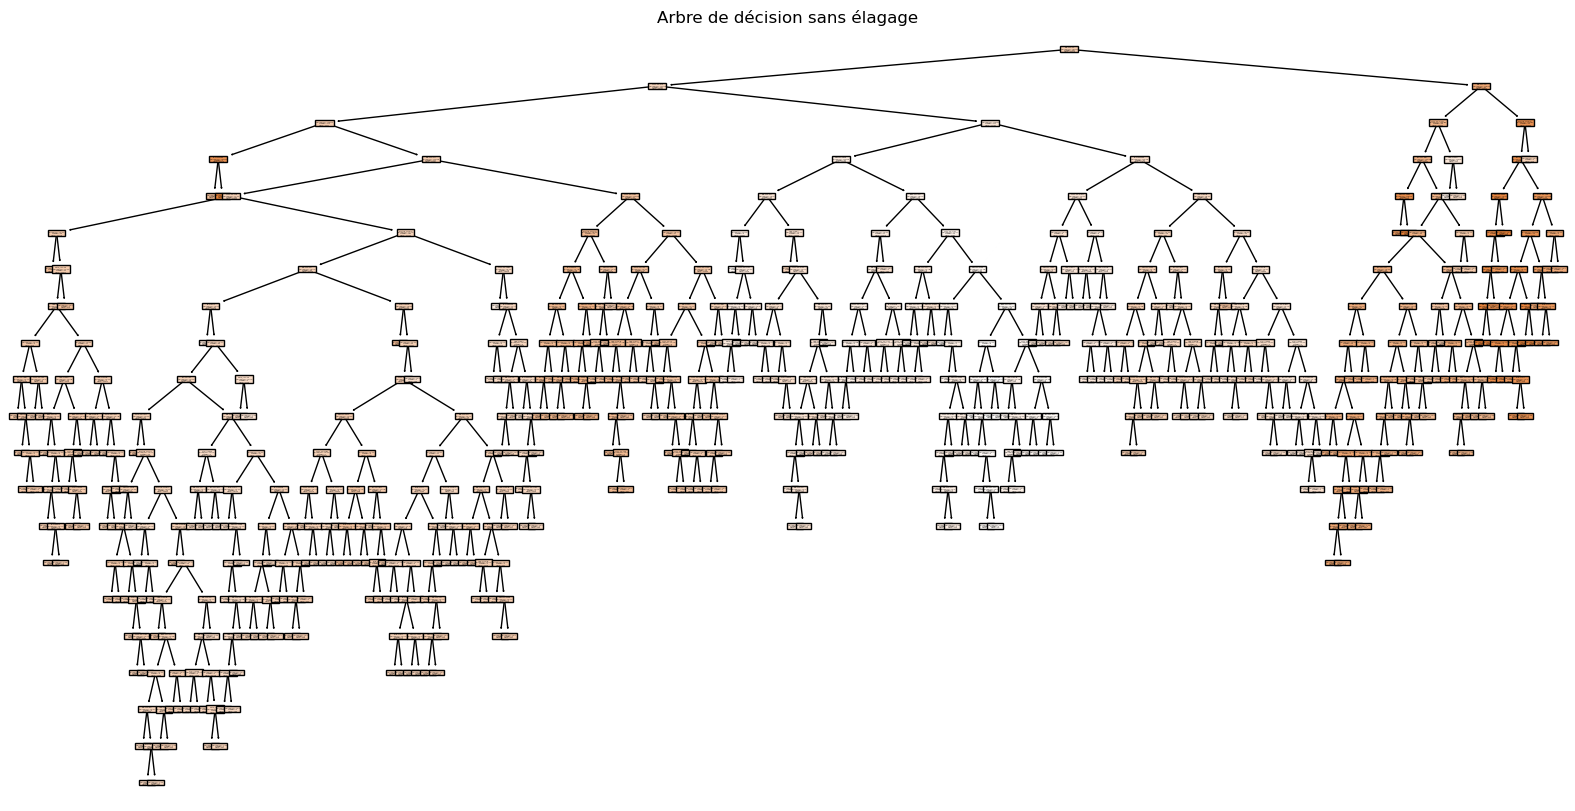

In [19]:
# une fois entrainé, l'arbre de decision je fais le graphique avec  plot_tree

from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualiser l'arbre de décision sans élagage
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train_transformed_df.columns)
plt.title("Arbre de décision sans élagage")
plt.show()

critire de base de l'arbre de decision
- il prend la base initial 
- il divise en sous-groupe(noeud)( sur quel critere de division:  sur le principe de variance cad la variance entre les ind d'un meme groupe doit etre très faible et la variance entre les ind de 2 groupes different doit etre très élévee)
- il divise ainsi de suite jusqu'a c'est plus possible de diviser

seuil de coupure = 2  cad a chaque fois il divide en 2
critère de coupure= il faut que dans un noeud on a des maisons qui se ressemble et a l'exterieur de 2 noeud on a des maison completement different en terme de prix

si on a un arbre qui est trop profond, le modèle sera trop precis, et il va trop apprendre de la base d'apprentissage

- Alors a quel niveau je dois arreter ma division pour avoir un ARBRE OPTIMAL

+ si c'est trop profond comme ce qu'on voit la on aura un arbre très complexe difficile a expliquer , mais preci

  
+ si je ne divise pas assez aussi , l'arbre se sera pas suffisement precis pour pouvoir faire la prediction mais simple

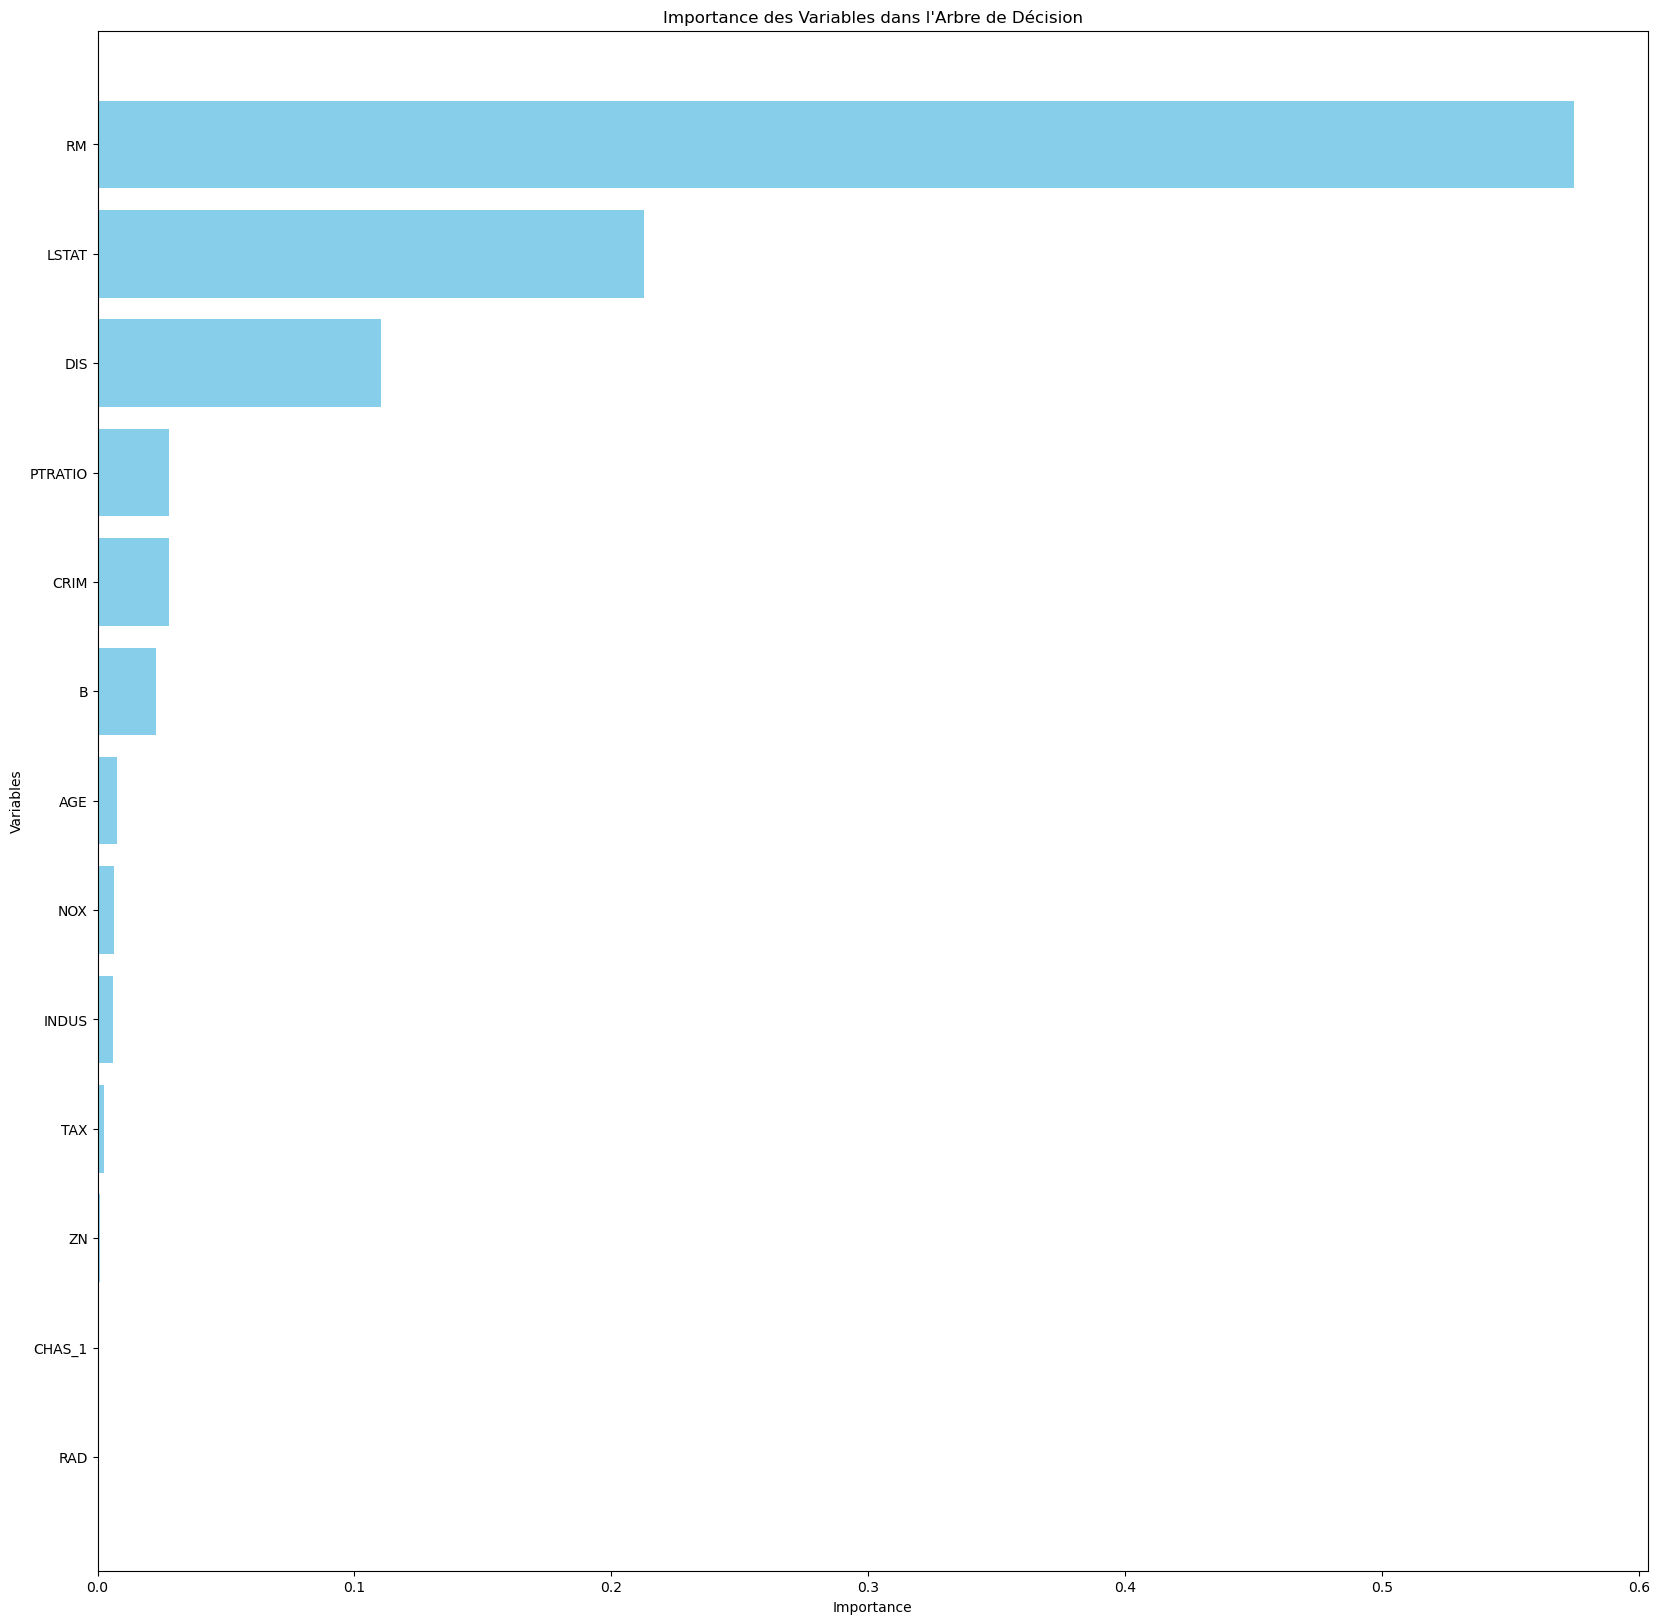

In [22]:
# avant de passer a l'OPTIMISATION DE L'ABRE on a la possibilité de voir quels sont les variables les plus importantes utilisée pour realiser
#cette arbles de decision

#Importance des variables
# Récupérer l'importance des variables du modèle
importances = tree.feature_importances_

# Obtenir les noms des colonnes à partir du DataFrame
feature_names = X_train_transformed_df.columns

# Créer un DataFrame pour organiser l'importance des variables
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Trier les variables par ordre décroissant d'importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Créer le graphique
plt.figure(figsize=(20, 20))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.title("Importance des Variables dans l'Arbre de Décision")
plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir les variables les plus importantes en haut
plt.show()

on peut dire que 
+ le 1° coupure de ma base : est basé sur la variable (RM): le nombre de pièce par logement
+ la 2° coupure de ma base: est basé sur la variable (LSTAT)
+ la 3° coupure : basé sur la variable (DIS)

ainsi de suite

# Optimisation de arbre de decision

In [24]:
# optimiser l'arbre de decision pour mieux l'expliquer/ trouver la hauteur optimale de l'arbre
# pour cela on fait de la VALISATION CROISEE via le  GridSearchCV

from sklearn.model_selection import GridSearchCV
# Définir la grille de paramètres à tester

#  on Définit une grille de paramètres à tester uniquement pour la profondeur de l'arbre appelé= max_depth
# on procede par tatonement on va tester plusieurs niveau possible: range(1, 11) cad le teste un arbre partant du niveau 1 au niveau 10
# [None] cad le teste aussi un arbre sans aucun niveau
param_grid = {
    'max_depth': list(range(1, 11)) + [None] # Profondeur maximale de l'arbre

    
}

#  je construis mon arbre de decision / Utiliser des valeurs fixes pour min_samples_split et min_samples_leaf
# min_samples_split = 50. cad je veux que dans chaque noeud on ait minimum 50 observations, si il y'a pas assez sa ne serait pas interpretable
#  min_samples_leaf=50  meme a chaque feuille
tree_model = DecisionTreeRegressor(random_state=42, min_samples_split = 50, min_samples_leaf = 50 )

In [26]:
# une fois construi mon arbre de decision, je choisi , le meilleur parametre par Validation croisée

# Effectuer la recherche par grille avec validation croisée

# ici  sa teste toute les possibilité de parametre
# sa fait un arbre avec 1 niveau , on voit sa performance (via son erreur neg_mean_squared_error)
 # puis sa fait un arbre avec 2 niveau, on voit sa performance...
# ainsi de suite jusqu'a 10 niveau...

# puis on choisit alla fin l'arbre le plus performaant cad celui avec l'erreur le plus faible

# cv=5 (validation croisée) cad je vais cree 5 block sur ma base de donnnee/ il divise ma base en 5
# plus tu as de données plus tu peux reduire le cv, en general on met 5 par defaut pour choist le meilleur parametre

# scoring cad qu'est ce que je veux optimiser, je veux faire en sorte que l'erreur soit la plus faible possible, c'est erreur c'est le
# neg_mean_squared_error


# utlilise GridSearchCV pour rechercher les meilleurs valeurs de la profondeur maximale et du nombre d'observation par noeud

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_transformed_df, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(min_samples_leaf=50,
                                             min_samples_split=50,
                                             random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]},
             scoring='neg_mean_squared_error')

In [28]:
#  une fois tester toutes les possibilité on Extrait le meilleur arbre de décision en choisissant le meilleur parametre
best_tree = grid_search.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=3, min_samples_leaf=50, min_samples_split=50,
                      random_state=42)

j'ai utilisé unr technique de vlidation croisée pour ajuster mes paramètres

pour une base de taille moyenne comme la mienne 506 observation
+ j'ai tester une plage de (5 a 50) pour mon min_samples_split
+  une place de (1 a 20) pour mon min_samples_leaf

+  au final mon meilleur arbre aura une profondeur de 5, avec 5 oberservations par noeud et 10 pour chauque feuille

  c'est vrai c'est le nombre de mon min_samples_split qui me donne une erreur faible; mais le fait qu'il y'as pas assez d'bservations dans les noeuds, ce n'est pas interpretable. 
  donc ce parametre je ne le teste pas , je le choisit moi meme/ et ouis sa me donne les valeurs predite de la maison de 20 ou 25 euro chose qui n'est pas realiste

In [30]:
# Afficher les meilleurs hyperparamètres
print(f"Meilleurs paramètres: {grid_search.best_params_}")
print(f"Erreur quadratique moyen (MSE): {-grid_search.best_score_}")

Meilleurs paramètres: {'max_depth': 3}
Erreur quadratique moyen (MSE): 38.73249662508131


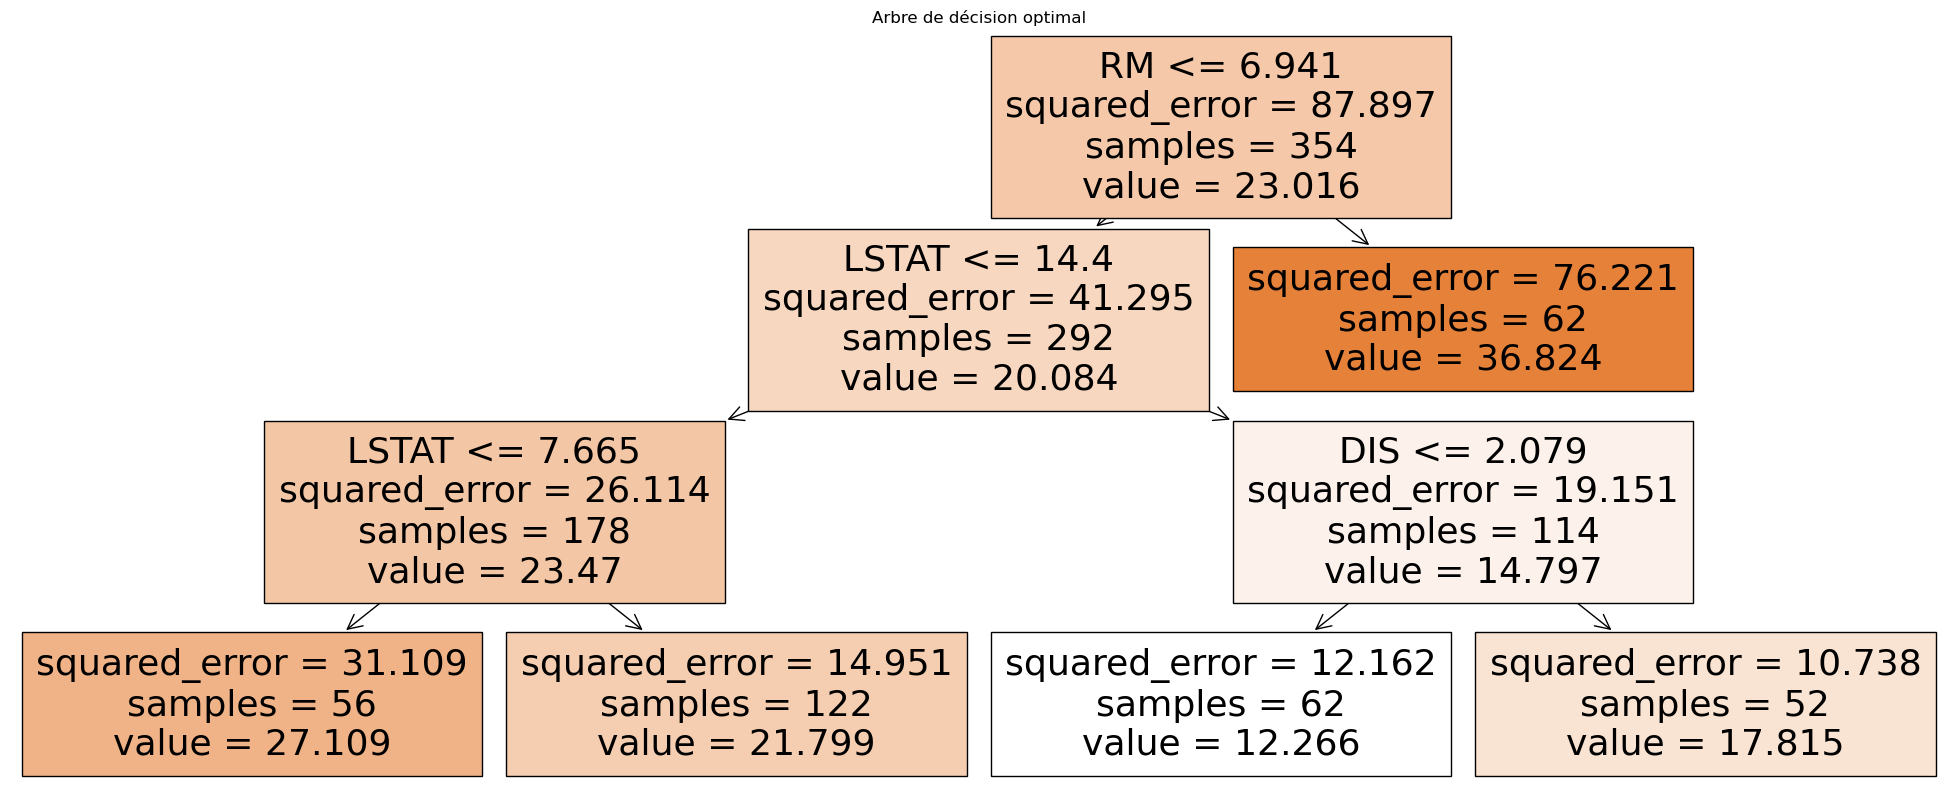

In [32]:
# Visualiser l'arbre de décision optimal ayant deja le meilleur parametre
plt.figure(figsize=(25,10))
plot_tree(best_tree, filled=True, feature_names=X_train_transformed_df.columns)
plt.title("Arbre de décision optimal")
plt.show()

interpretation
+ si le nombre de piece par logement (RM) est <= 6.941, et  LSTAT <=14.4, et LSTAT<= 7.665 ---> alors le prix de la  maison aura une valeur de 21.799£
sinon si RM > 6.941 ----> alors le prix de la  maison aura une valeur de 36.824£

+ si  RM <= 6.941, et LSTAT <= 14.4, et DIS <= 2.079 ----> alors le prix de la  maison aura une valeur de 12.266£

ATTENTION 
 jai fixe le minimum a 50 avec min_samples_split= 50 = cad je veux minimum 50 0bservation dans chaque noeud: a 50 parce que ma base n'est pas assez grande j'ai juste 506 observation au total/ et ainsi sa pourra diviser d'avantage
 normalement pour une base assez grande on le fixe a 100


comparable au R2 qui est une grandeur pertinante qu'on regarde. et qu'on optimise  dans la regression lineaire

- ici sur l'arbre de decisionn, la grandeur pertinente a optimiser  c'est mean_squared_error


ce niveau optimale de profondeur = 5 de mon arbre, c'est le niveau d'arret de la division qui me garanti , les bonnes performances de mon arbre

In [34]:
# Prédictions sur mes 2 bases entrainement et test
y_pred_train = best_tree.predict(X_train_transformed_df)
y_pred_test = best_tree.predict(X_test_transformed_df)

In [36]:
# quel marge d'erreeur est acceptables pour evaluer les performances , la encore c'est relatif

# 1° indicateur: Corrélation= y'a t'il un lien entre ma valeur predite et la valeur relle? plus elle est elevé plus ma prediction est bonne
# 2°indicateur: R2 = plus il est eleve plus le modele est pertinant
# 2°indicateur: Rmse= plus c'est faible mieux c'est

# calcul des metriques sur ma base d'apprenstissage

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# fonction pour calculer le MAPE
def mean_absolute_percentage_erreur(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

train_correlation = np.corrcoef(y_train, y_pred_train)[0,1]
train_R2 = r2_score(y_train, y_pred_train)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train ))
train_MAE = mean_absolute_error(y_train, y_pred_train )
train_MAPE = mean_absolute_percentage_erreur(y_train, y_pred_train )


#  calcul des metriques sur ma base de  test
                     
test_correlation = np.corrcoef(y_test, y_pred_test)[0,1]
test_R2 = r2_score(y_test, y_pred_test)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test ))
test_MAE = mean_absolute_error(y_test, y_pred_test )
test_MAPE = mean_absolute_percentage_erreur(y_test, y_pred_test)


results = pd.DataFrame({
    "Metrique": ["correlation", "R2", "RMSE", "MAE", "MAPE"],
    "train": [train_correlation, train_R2, train_RMSE, train_MAE,  train_MAPE ],
    "test": [test_correlation, test_R2, test_RMSE,  test_MAE, test_MAPE ]
})

results = results.round(4)

results

,Metrique,train,test
0,correlation,0.8315,0.7917
1,R2,0.6913,0.6266
2,RMSE,5.2087,5.2747
3,MAE,3.5635,3.7616
4,MAPE,17.2014,19.6506


CONCLUSION

mon modèle perfome aussi bien soit sur ma base d'apprentissage, soit sur ma base test, car les indicateurs clées sont assez proche donc le peux le VALIDER et le mettre en production

lequel donc choisir entre la REGRESSION LINEAIRE ET l'ARBRE DE DECISION

ARBRE DE DECISION:
- correlation très elevé sur les 2 bases: donc on a un fort lien entre la valeur predite et la valeur reelle
-  R2 . elevé egalement on a 62% ici dans la regression on avait 60%
-  RMSE.. plus faible dans ici sur l'arbre de decision par rapport a la regression
-  MAPE..  est plus faible egalement sur l'arbre de decision par rapport a la regression

visiblement , au vu des performances l'ARBRE DE DECISION EST le meilleur MODELE


ATTENTION:
sa c'est un choix STATISTIQUE, mais en fonction de la situation je peux priviliger un modèle par rapport a l'autre meme si il est moins performant statistiquement parlant.

- dans ce cas le choix se base sur la conaissance metier
  
autre argument qu'on peut mettre en avant dans notre choix:

dans mon cas certe l'ARBRE DE DECISION est plus performant, mais je choisi plutot la REGRESSION LINEAIRE, parce que avec sa
- je peux voir l'impact sur ma cible
- je peux mieux interpreter. 

- INCOVENIANT DE L'ARBRE DE DECISION: c'est trop instable si je change ma base d'apprentissage, l'arbre peut changer donc il est très sensible a l'echantillon sur lequel on developpe l'arbre
   
- puis je trouve ses prediction pas realiste, une maison ne peut valoir 12.266 £ par exemple

- alors j'envisage donc  d'autres modele qui me donne des prediction plus STABLE

pour eviter donc cette instabilité, on construit une FOREST ALEATOIRE= cet a dire un modèle qui est constitué de plusieurs arbres

la question donc centrale ici: combien d'arbre de decision je dois mettre dans mon modèle

## Modeles complexe ( et les plus utiliSés en fonction du secteur)

ces modèles ne sont pas aussi simple a expliquer comment sa marche , on est meme pas capable de savoir quel est la relation entre les variables

- mais il y'a des techniques qui permettent d'interpreter/ expliquer ces modèles complexes.  raison pour laquelle on peut se permettre de les utiliser

en bank par exemple:
- dans la GESTION DE RISQUE : ou c'est très reglementé , la reglementation nous dis d'utiliser les modèles facilement EXPLICABLE

 mais ces MODELES COMPLEXES sont quand meme utiliséS surtout dans la partie: 
-  processus de SELECTION DES VARIABLES pour mieux faire le choix des variables
- et COMME MODELES CHALLENGER  juste pour voir a quel point la regression logistique ( modèle simple) qu'on a , si c'est trop ecarté en terme de performance

  mais dans d'autre secteur

c'est assez tres basique et frequent utiliser ces modèles complexes


- foret aleatoire
- modeles de boosting (Adaboost, XGBoost, LighGBM, Catboost)

# 1- Random Forest

ce modèle se base sur un principe appelé la SAGESSE DE LA FOULE

PREDICTION = je fais la moyennee des predictions de mes arbres , pour avoir la prediction final

- construction: dans la construction d'une forest aleatoire , on prend le plus grand nombre d'arbre possible, pas besoin d'optimiser, par defaut dans la pratique on prend 500 arbres

- puis pour que la forest aleatoire fonctionne très bien il faut que les coupures mes 500 arbres soit differentes, pour que cela arrive donc il faut que pour l'arbre A j'utilise 2 variables, l'arbre B j'utilise 2 autres ... ainsi de suite


  donc ce qu'il y'a a OPTIMISER dans la forest aleatoire:

  . c'est le nombre de variable a introduit dans chaque arbre/ pas mettre toutes les variable dans                                                             toutes les arbres, on aura tjr le meme résultat dans ce cas

Parametres a optimiser:

- nombre d'arbre dans ma forest
- profondeur maximale(cad le nombre de variable pour chaque arbre)
- le nombre minimal d'echantillon ( dans chaque noeud on doit avoir assez d'opservation/ 100, 50 dependement de la taille)

Nota: dans la foret aleatoire c'est pas possible de visualiser les 500 arbres que tu as construis

## foret aleatoire sans optimisation

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Créer et entraîner une forêt aléatoire sans optimisation
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_transformed_df, y_train)

RandomForestRegressor(random_state=42)

In [44]:
# Faire des prédictions/ avec la base d'apprentissage (X_train_transformed_df) et la nouvelles base de donnees (X_test_transformed_df)
y_pred_train_rf = rf.predict(X_train_transformed_df)
y_pred_test_rf = rf.predict(X_test_transformed_df)

### Evaluation de performance

In [46]:

# calcul des metriques sur ma base d'apprenstissage

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# fonction pour calculer le MAPE
def mean_absolute_percentage_erreur(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

# calcul des metriques sur ma base train

train_correlation = np.corrcoef(y_train, y_pred_train_rf)[0,1]
train_R2 = r2_score(y_train, y_pred_train_rf)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train_rf ))
train_MAE = mean_absolute_error(y_train, y_pred_train_rf )
train_MAPE = mean_absolute_percentage_erreur(y_train, y_pred_train_rf )


#  calcul des metriques sur ma base de  test
                     
test_correlation = np.corrcoef(y_test, y_pred_test_rf)[0,1]
test_R2 = r2_score(y_test, y_pred_test_rf)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test_rf ))
test_MAE = mean_absolute_error(y_test, y_pred_test_rf )
test_MAPE = mean_absolute_percentage_erreur(y_test, y_pred_test_rf)


results = pd.DataFrame({
    "Metrique": ["correlation", "R2", "RMSE", "MAE", "MAPE"],
    "train": [train_correlation, train_R2, train_RMSE, train_MAE,  train_MAPE ],
    "test": [test_correlation, test_R2, test_RMSE,  test_MAE, test_MAPE ]
})

results = results.round(4)

results

,Metrique,train,test
0,correlation,0.9893,0.9340
1,R2,0.9765,0.8712
2,RMSE,1.4376,3.0975
3,MAE,0.9214,2.0717
4,MAPE,4.5873,10.8427


en terme de performance l'arbre la forest aleatoire performe nettement mieux que les autres


l'avantage de l'arbre de decision: c'est en terme d'explicabilité, je peux presenter sa au metier il comprend

- mais par contre dans la FOREST ALEATOIRE, je ne peux pas presenter les 1000 arbres qui le comporte au metier , il sera totalement perdu
raison pour laquelle je peux dire:

+ voici comment je fais ma prediction, sa se passe sur un principe d'arbre
+  et voici les variables qui sont les plus importantes dans mon modèle

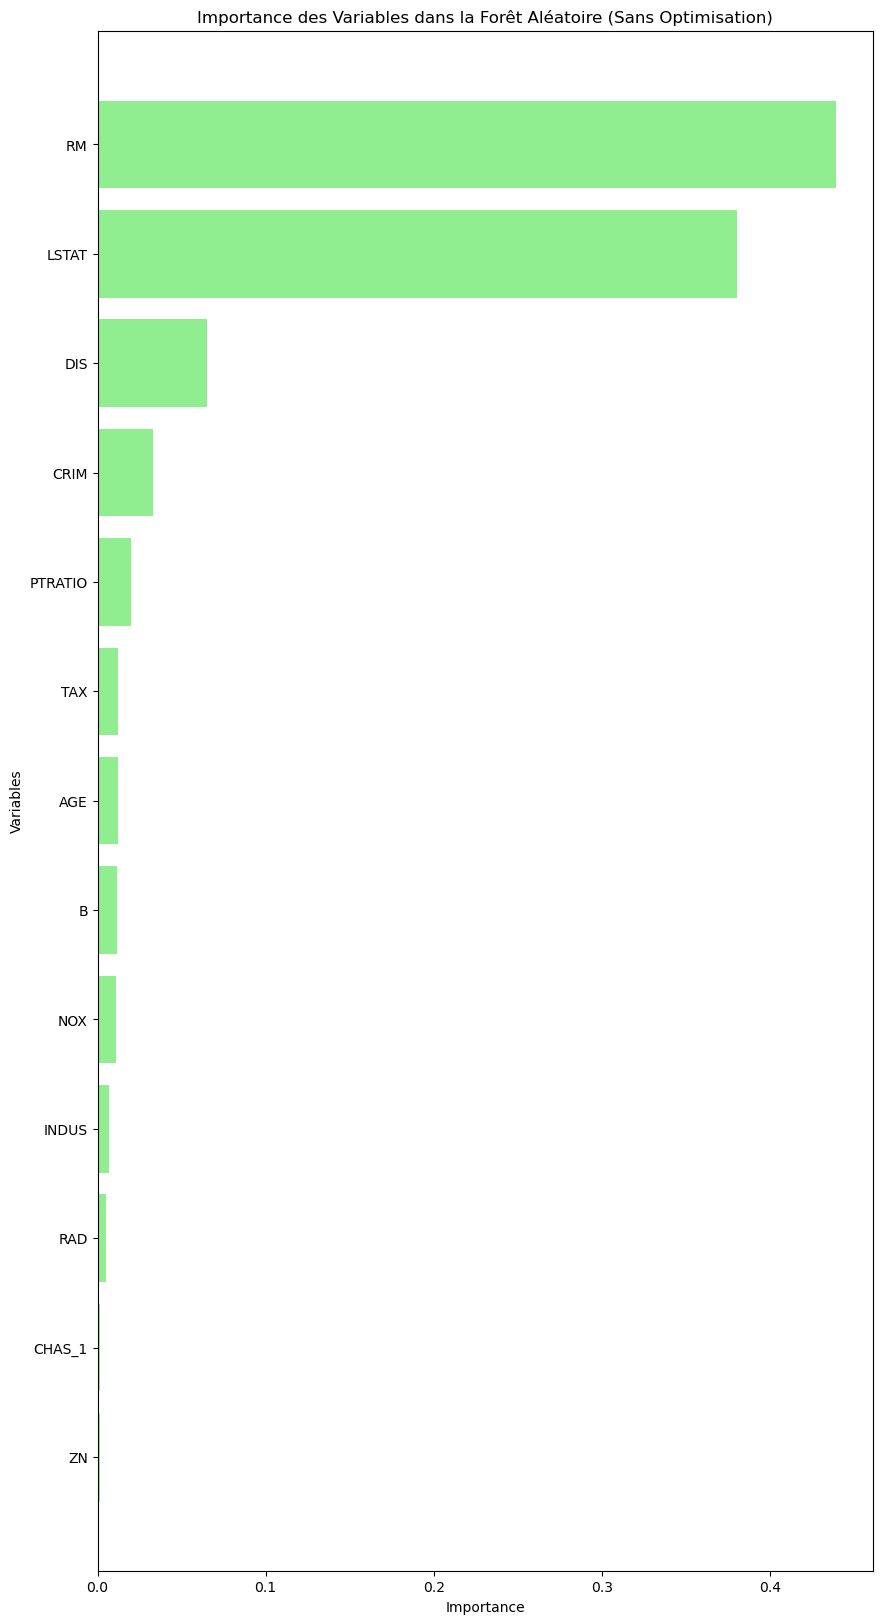

In [48]:
# avant de passer all alla forest aleatoire avec les parametres optimiser, voyons les variables ples plus importants qui ont eté utiliser pour construire
# mes 500 arbres..

# Importance des variables
importances_rf = rf.feature_importances_
feature_importances_rf_df = pd.DataFrame({
    'Feature': X_train_transformed_df.columns,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

# Visualiser l'importance des variables
plt.figure(figsize=(10, 20))
plt.barh(feature_importances_rf_df['Feature'], feature_importances_rf_df['Importance'], color='lightgreen')
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.title("Importance des Variables dans la Forêt Aléatoire (Sans Optimisation)")
plt.gca().invert_yaxis()
plt.show()

sa c'est la forest aleatoire basique:  mais en tant expert on doit optimiser le nombre les paratres dit plus haut

## foret aleatoire avec optimisation

parametre a optimiser:
- n_estimators = nombre d'arbres de decision  dans mon modele on pren le max qu'on veux par defaut on prend 500
- max_features = nombre de variable pour chaque arbre

  NOTE: quand on est en regression(prediction d'une variable quanti) ou en classification, on a :
  
  - 1°astuce theorique: le max_features = la racine carré du nombre total de variable de depart
  - 2° actuce theorique: le max_features est  automatique on prend toutes les variables
  - 3° astuce theorique: le max_features c'est le logarithme du nombre total de variables

In [50]:
# Le nombre de variable à choisir est la racine carré en régression

# Créer et entraîner une forêt aléatoire avec 500 arbres et max_features='sqrt'
rf_sqrt = RandomForestRegressor(n_estimators=500, max_features='sqrt', random_state=42)
rf_sqrt.fit(X_train_transformed_df, y_train)

# Faire des prédictions sur l'ensemble d'entraînement et de test
y_pred_train_rf_sqrt = rf_sqrt.predict(X_train_transformed_df)
y_pred_test_rf_sqrt = rf_sqrt.predict(X_test_transformed_df)

## evaluation de performance

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# fonction pour calculer le MAPE
def mean_absolute_percentage_erreur(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

# calcul des metriques sur ma base train

train_correlation = np.corrcoef(y_train, y_pred_train_rf_sqrt)[0,1]
train_R2 = r2_score(y_train, y_pred_train_rf_sqrt)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train_rf_sqrt ))
train_MAE = mean_absolute_error(y_train, y_pred_train_rf_sqrt )
train_MAPE = mean_absolute_percentage_erreur(y_train, y_pred_train_rf_sqrt )


#  calcul des metriques sur ma base de  test
                     
test_correlation = np.corrcoef(y_test, y_pred_test_rf_sqrt)[0,1]
test_R2 = r2_score(y_test, y_pred_test_rf_sqrt)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test_rf_sqrt ))
test_MAE = mean_absolute_error(y_test, y_pred_test_rf_sqrt )
test_MAPE = mean_absolute_percentage_erreur(y_test, y_pred_test_rf_sqrt)


results = pd.DataFrame({
    "Metrique": ["correlation", "R2", "RMSE", "MAE", "MAPE"],
    "train": [train_correlation, train_R2, train_RMSE, train_MAE,  train_MAPE ],
    "test": [test_correlation, test_R2, test_RMSE,  test_MAE, test_MAPE ]
})

results = results.round(4)

results

,Metrique,train,test
0,correlation,0.9928,0.9297
1,R2,0.9807,0.8529
2,RMSE,1.3015,3.3105
3,MAE,0.8725,2.0694
4,MAPE,4.3012,10.4274


## foret aleatoire avec optimisation/  selon les 3 astuces theoriques de max_features

In [54]:
# Définir la grille de paramètres pour optimiser uniquement 'max_features'
# en gros via la technique de vaidation croise le teste plusieurs modele, avec le parametre max_features correspondant a chaque astuce theorique
# puis j'extrai le meilleir modele , qui est faible en terme d'errreur pour faire ma prediction
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2']  # Options pour choisir le nombre de variables sélectionnées par arbre
}

# Créer un modèle RandomForest
rf_model = RandomForestRegressor(random_state=42)

# Créer la recherche par grille (GridSearchCV) pour optimiser 'max_features'
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                              cv=5, scoring='neg_mean_squared_error')

# Entraîner le modèle avec la recherche par grille
grid_search_rf.fit(X_train_transformed_df, y_train)

# Meilleurs paramètres obtenus
print(f"Meilleur paramètre max_features : {grid_search_rf.best_params_}")

C:\Users\tchaf\anaconda3\Anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\tchaf\anaconda3\Anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\tchaf\anaconda3\Anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the defa

Meilleur paramètre max_features : {'max_features': 'sqrt'}


In [56]:
# nombre de variables de ma base
len(X_train_transformed_df)

354

In [58]:
# meilleur parametre selon le test on a vu c'est max_features : sqrt
# donc le nombre de variables pour chaque arbre = racine carré de toutes mes variables

max_features = np.sqrt(354)
max_features                    # donc pour chaque arbre on utile 18 variables pour le construire

18.81488772222678

In [60]:
# on extrait le meilleur modele pour faire nos prediction
best_rf_model = grid_search_rf.best_estimator_

In [62]:
# en testant tous les options  de max_features sa me donne sqrt = ce qui revient au meme modele plus haut  avoir sans tester toutes les option
# donc a refesant la prediction j'aurai les meme performances

# Faire des prédictions avec le modèle optimisé
y_pred_train_rf_opt = best_rf_model.predict(X_train_transformed_df)
y_pred_test_rf_opt = best_rf_model.predict(X_test_transformed_df)

## Evaluation performance

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# fonction pour calculer le MAPE
def mean_absolute_percentage_erreur(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

# calcul des metriques sur ma base train

train_correlation = np.corrcoef(y_train, y_pred_train_rf_opt)[0,1]
train_R2 = r2_score(y_train, y_pred_train_rf_opt)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train_rf_opt ))
train_MAE = mean_absolute_error(y_train, y_pred_train_rf_opt )
train_MAPE = mean_absolute_percentage_erreur(y_train, y_pred_train_rf_opt )


#  calcul des metriques sur ma base de  test
                     
test_correlation = np.corrcoef(y_test, y_pred_test_rf_opt)[0,1]
test_R2 = r2_score(y_test, y_pred_test_rf_opt)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test_rf_opt ))
test_MAE = mean_absolute_error(y_test, y_pred_test_rf_opt )
test_MAPE = mean_absolute_percentage_erreur(y_test, y_pred_test_rf_opt)


results = pd.DataFrame({
    "Metrique": ["correlation", "R2", "RMSE", "MAE", "MAPE"],
    "train": [train_correlation, train_R2, train_RMSE, train_MAE,  train_MAPE ],
    "test": [test_correlation, test_R2, test_RMSE,  test_MAE, test_MAPE ]
})

results = results.round(4)

results

,Metrique,train,test
0,correlation,0.9907,0.9280
1,R2,0.9767,0.8515
2,RMSE,1.4312,3.3269
3,MAE,0.9042,2.0584
4,MAPE,4.4603,10.5022


en terme de performance la foret aleatoire optimisée une fois de plus performe nettement mieux que les autres

- on a le R2_test = 85% plus elevé
- et le RMSE_test = 3.32 plus faible

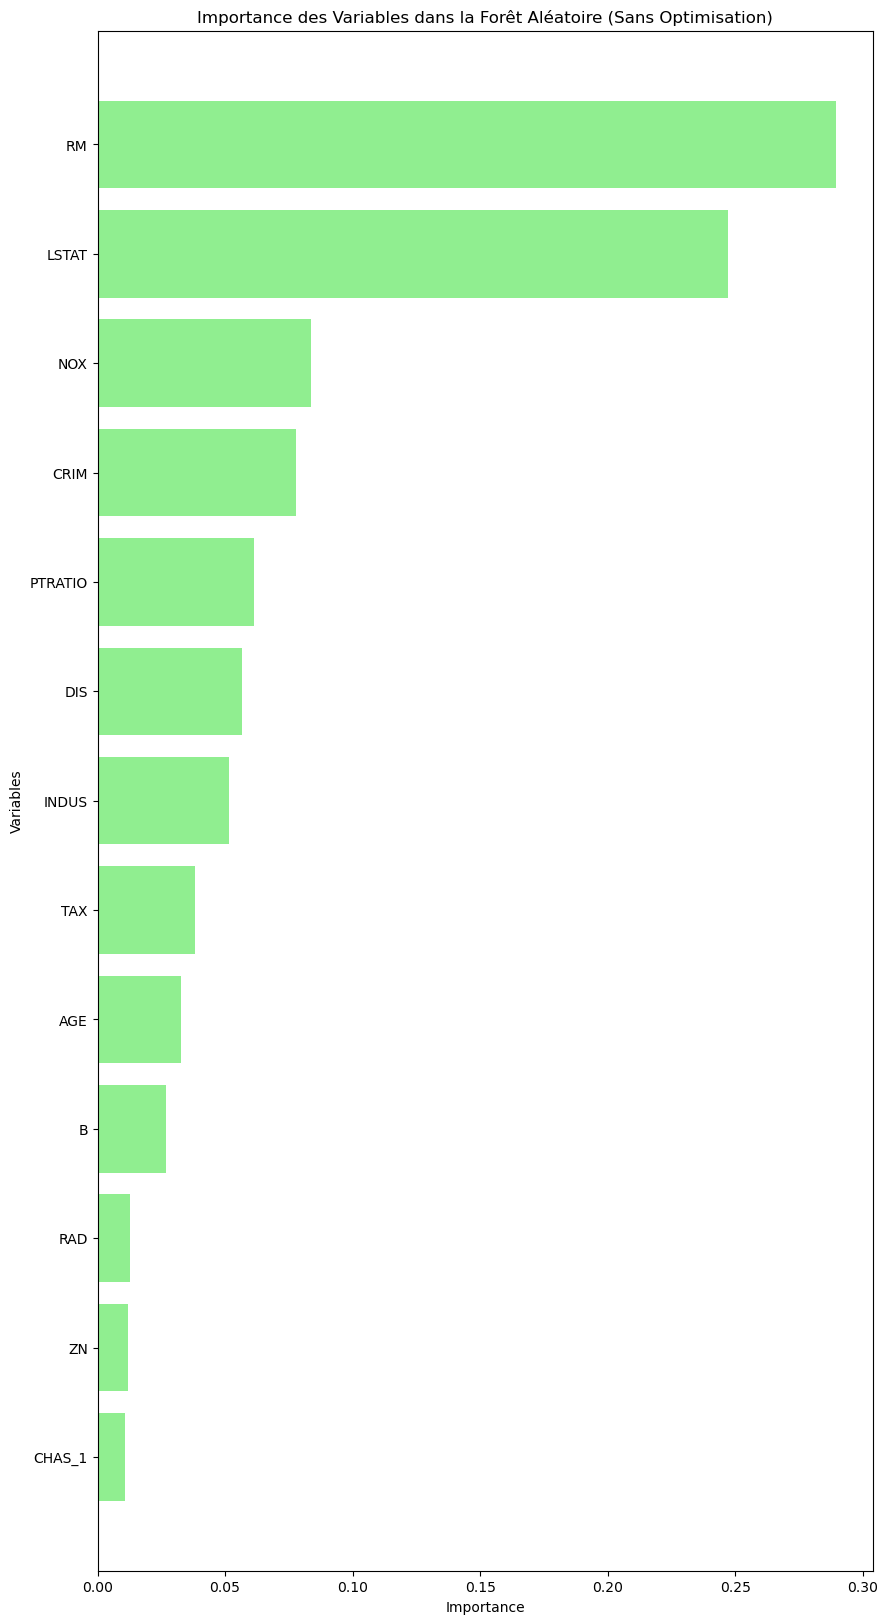

In [70]:
# forest aleatoire avec les parametres optimiser, voyons les variables ples plus importants qui ont eté utiliser pour construire
# mes 500 arbres..

# Importance des variables
importances_rf = best_rf_model.feature_importances_
feature_importances_rf_df = pd.DataFrame({
    'Feature': X_train_transformed_df.columns,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

# Visualiser l'importance des variables
plt.figure(figsize=(10, 20))
plt.barh(feature_importances_rf_df['Feature'], feature_importances_rf_df['Importance'], color='lightgreen')
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.title("Importance des Variables dans la Forêt Aléatoire (Sans Optimisation)")
plt.gca().invert_yaxis()
plt.show()